In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
a, b, c, d, e = -12, -18, 5, 10 , -30


In [4]:
limit = 10
step = 0.01
step_acr = 0.0000001
line_style = '-'
color = 'b'
direct_up = True

In [5]:
def switch_line():
    global line_style
    if line_style == '-':
        line_style = '--'
    else:
        line_style = '-'
    return line_style

In [6]:
def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color

In [7]:
def func(x):
        
    f = a * x ** 4 * np.sin(np.cos(x)) + b * x ** 3 + c * x ** 2 + d * x + e
    return f

In [8]:
x = np.arange(-limit, limit + step, step)
x_change = [(-limit, 'limit')]

In [12]:
for i in range(len(x) - 1):
    if func(x[i]) > 0 and func (x[i + 1]) < 0 or func(x[i]) < 0 and func (x[i + 1]) > 0:
        x_acr = np.arange(x[i],  x[i + 1] + step_acr, step_acr)
        for j in range(len(x_acr) - 1):
            if func(x_acr[j]) > 0 and func (x_acr[j + 1]) < 0 or func(x_acr[j]) < 0 and func (x_acr[j + 1]) > 0:
                x_change.append((x_acr[j], 'zero'))
     
    if direct_up:
        if func(x[i]) > func(x[i + 1]):
            direct_up = False
            x_change.append((x[i], 'dir'))
    else:
        if func(x[i]) < func(x[i + 1]):
            direct_up = True
            x_change.append((x[i], 'dir'))

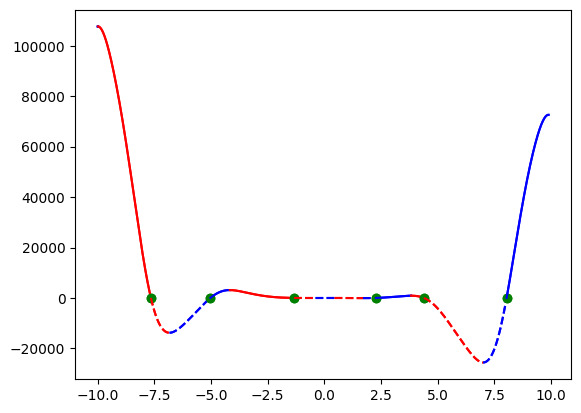

In [13]:
for i in range(len(x_change) - 1):
    cur_x = np.arange(x_change[i][0], x_change[i + 1][0] + step, step)
    if x_change[i][1] == 'zero':
        plt.plot(x_change[i][0], func(x_change[i][0]), 'go')
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    else:
        plt.plot(cur_x, func(cur_x), switch_color())

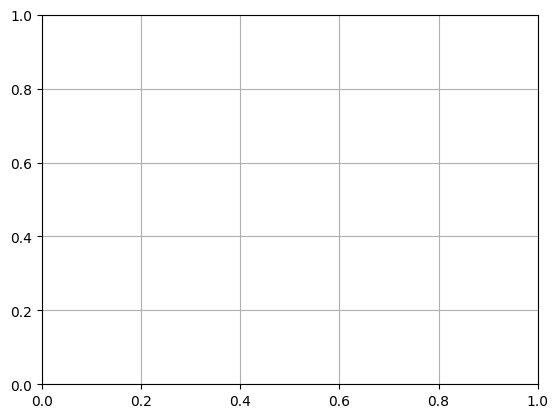

In [14]:
plt.grid()
plt.show()  